In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline
import seaborn as sns
origin = pd.read_csv('F:\Study\weiboPredict\data\WeiboProfile.train', 
                     sep='\001', 
                     encoding='utf-8',
                     quoting=3)
repo = pd.read_csv('F:\Study\weiboPredict\data\\trainRepost.txt', 
                   sep='\001', 
                   encoding='utf-8', 
                   quoting=3).fillna(value='', axis=1)  # replace Na with empty string
print('origin: ', len(origin), '\n', 'repo: ', len(repo))

Populating the interactive namespace from numpy and matplotlib


origin:  26998 
 repo:  15975387


In [2]:
sample_size = 26998
# randomly choose 200 posts for testing analyze
import random
sample_indices = random.sample(range(origin.values.shape[0]), sample_size)

sample_origin = origin.loc[sample_indices]
sample_repo = repo[repo.w_id.isin(sample_origin.w_id)]
del origin,repo
sample_origin.head()

,w_id,author_id,time,content
3591,3957973132752198,5511390,12:03:13,#动漫资源社#好想做一只雪鼬，世界上最小的肉食哺乳动物，激萌又勇猛，随时都会饿，24小时不停...
19955,3945048791819836,3088860,20:06:30,炒股软件应用小技巧系列一。欢迎大家多交流，评论和转发。谢谢 http://t.cn/RGSU...
767,3905082389006883,5511390,13:14:17,#新番推荐#【目前已确定的25部一月新番一览表出炉】目前已知的确定档期的25部2016年一月...
17766,3937453964061071,3260686,21:07:22,http://t.cn/Rbrgtuu 这么久我从来没有正面的去刚过谁，但是这一次，为了我菲...
5293,3935967872271117,6986968,18:42:10,我是不懂衣服这种东西……


In [3]:
sample_repo.head()

,w_id,from_id,repo_id,timestamp,content
0,3903741306239294,2848188,8381213,58674,
1,3972184907435086,5368578,8381203,53713,
2,3903069714925188,6854938,8381203,7828688,
3,3934248572099610,4130595,8381203,299103,
4,3945441579517170,7853791,8381203,11929,@空仕安forever @余瑞廉2013 @吴成军1982


In [4]:
index,counts = np.unique(sample_repo.w_id.values,return_counts=True)
sample_origin['repo_num'] = pd.DataFrame(data=counts,index=index).reindex(sample_origin.w_id.values).values
sample_origin.head()

,w_id,author_id,time,content,repo_num
3591,3957973132752198,5511390,12:03:13,#动漫资源社#好想做一只雪鼬，世界上最小的肉食哺乳动物，激萌又勇猛，随时都会饿，24小时不停...,242.0
19955,3945048791819836,3088860,20:06:30,炒股软件应用小技巧系列一。欢迎大家多交流，评论和转发。谢谢 http://t.cn/RGSU...,987.0
767,3905082389006883,5511390,13:14:17,#新番推荐#【目前已确定的25部一月新番一览表出炉】目前已知的确定档期的25部2016年一月...,197.0
17766,3937453964061071,3260686,21:07:22,http://t.cn/Rbrgtuu 这么久我从来没有正面的去刚过谁，但是这一次，为了我菲...,78.0
5293,3935967872271117,6986968,18:42:10,我是不懂衣服这种东西……,334.0


In [5]:
#只取datetime中的time
dt = pd.to_datetime(sample_origin.time)
sample_origin.time = [t.time() for t in dt]

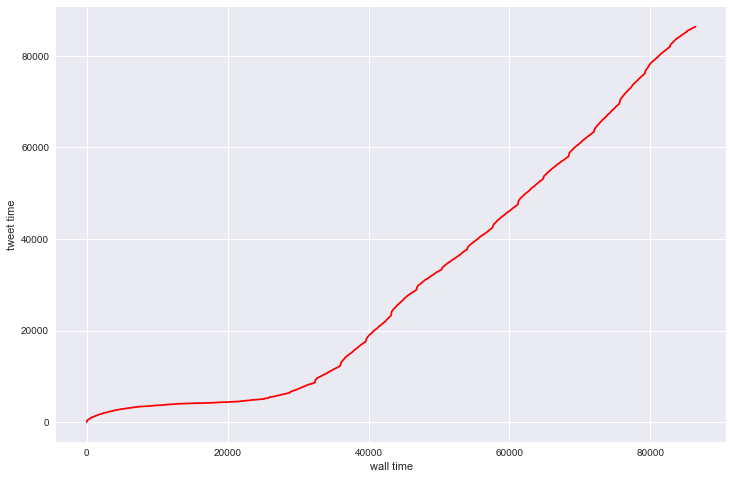

In [8]:
#计算Tweet time tt
Nt = np.zeros(86400)
for t in sample_origin.time :
    Nt[t.hour*3600+t.minute*60+t.second:] = Nt[t.hour*3600+t.minute*60+t.second:]+1 
tt = Nt*86400/sample_size
plt.clf()  # clear the plot
fig = plt.figure(figsize=(12.0, 8.0))  # create a new figure
ax = fig.gca()  

ax.set_xlabel("wall time")
ax.set_ylabel("tweet time")
plt.plot(range(86400), tt, 'r-')
plt.show()

In [9]:
grouped_repo = sample_repo.groupby(['w_id'], as_index=True, sort=False)

In [10]:
def arrivetime_to_tt(df,origin=sample_origin,Tt=tt):
    post_time = origin[origin['w_id']==df['w_id'].iloc[0]].time.iloc[0]
    post_time_s = post_time.hour*3600+post_time.minute*60+post_time.second
    post_tt = Tt[post_time_s]
    df['repo_tt'] = Tt[(df['arrive_wt']+post_time_s)%86400]
    df['arrive_tt'] = ((post_time_s+df['arrive_wt'])/86400).astype(int)*86400 + df['repo_tt'] - post_tt 
    
    return df[df['arrive_tt']<=3600].sort_values('arrive_tt')

In [11]:
grouped_repo_1tth = grouped_repo.apply(arrivetime_to_tt)

In [12]:
sample_origin['max_interval'] = np.array(3600)
sample_origin['mean_interval'] = np.array(3600)
sample_origin['repo_num_1tth'] = np.array(0)
# sample_origin['arrive_tt'] = np.array([])
for iter in sample_origin.index:
    w_id = sample_origin.loc[iter,'w_id']
    if w_id in grouped_repo_1tth.index:
        repos = grouped_repo_1tth.loc[sample_origin.loc[iter,'w_id']]
        sample_origin.loc[iter,'repo_num_1tth'] = repos.shape[0]
        if repos.shape[0]>1:
            interval_tt = repos['arrive_tt'][1:].values-repos['arrive_tt'][:-1].values
            sample_origin.loc[iter,'max_interval'] = interval_tt.max()
            sample_origin.loc[iter,'mean_interval'] = interval_tt.mean()
    # origin_item['arrive_tt'] = repos['arrive_tt']

In [13]:
sample_origin.head()

,w_id,author_id,time,content,repo_num,max_interval,mean_interval,repo_num_1tth
3591,3957973132752198,5511390,12:03:13,#动漫资源社#好想做一只雪鼬，世界上最小的肉食哺乳动物，激萌又勇猛，随时都会饿，24小时不停...,242.0,348.825839,98.567301,36
19955,3945048791819836,3088860,20:06:30,炒股软件应用小技巧系列一。欢迎大家多交流，评论和转发。谢谢 http://t.cn/RGSU...,987.0,438.432476,43.697064,82
767,3905082389006883,5511390,13:14:17,#新番推荐#【目前已确定的25部一月新番一览表出炉】目前已知的确定档期的25部2016年一月...,197.0,508.837692,110.636767,22
17766,3937453964061071,3260686,21:07:22,http://t.cn/Rbrgtuu 这么久我从来没有正面的去刚过谁，但是这一次，为了我菲...,78.0,508.837692,242.636155,12
5293,3935967872271117,6986968,18:42:10,我是不懂衣服这种东西……,334.0,720.053337,19.558991,180


In [14]:
def put_label(X, label_num=5):
    sorted_X = np.sort(X)
    labels = np.zeros(X.shape)
    for i in reversed(range(label_num)):
        labels[X>sorted_X[int(X.shape[0]*i/label_num)]]+=1
    return labels

In [15]:
labels = put_label(sample_origin.repo_num.values,5)
sample_origin['labels'] = labels
sample_origin.head()

E:\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: invalid value encountered in greater


,w_id,author_id,time,content,repo_num,max_interval,mean_interval,repo_num_1tth,labels
3591,3957973132752198,5511390,12:03:13,#动漫资源社#好想做一只雪鼬，世界上最小的肉食哺乳动物，激萌又勇猛，随时都会饿，24小时不停...,242.0,348.825839,98.567301,36,2.0
19955,3945048791819836,3088860,20:06:30,炒股软件应用小技巧系列一。欢迎大家多交流，评论和转发。谢谢 http://t.cn/RGSU...,987.0,438.432476,43.697064,82,4.0
767,3905082389006883,5511390,13:14:17,#新番推荐#【目前已确定的25部一月新番一览表出炉】目前已知的确定档期的25部2016年一月...,197.0,508.837692,110.636767,22,2.0
17766,3937453964061071,3260686,21:07:22,http://t.cn/Rbrgtuu 这么久我从来没有正面的去刚过谁，但是这一次，为了我菲...,78.0,508.837692,242.636155,12,1.0
5293,3935967872271117,6986968,18:42:10,我是不懂衣服这种东西……,334.0,720.053337,19.558991,180,3.0


In [16]:
X = np.vstack((sample_origin.max_interval.values,
               sample_origin.mean_interval.values,
               sample_origin.repo_num_1tth.values)).transpose()
Y = np.array(sample_origin['labels'].values)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X= scaler.transform(X)

In [17]:
from sklearn.cross_validation import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(X, Y, test_size=0.2, random_state=42)

from time import time
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
 


clf = GaussianNB()


print ("-----------------timming-----------------------")
t0 = time()
clf.fit(features_train,labels_train)
print ("training time:", round(time()-t0, 3), "s")
t1 = time()
pred = clf.predict(features_test)
print ("predict time:", round(time()-t1, 3), "s")
 

hit = accuracy_score(labels_test, pred,normalize = False)
print ("-----------------output------------------------")
print ("test set size:", len(pred))
print ("hit:",hit)
print ("accuracy:",round(float(hit)/len(pred),5))

-----------------timming-----------------------
training time: 0.016 s
predict time: 0.006 s
-----------------output------------------------
test set size: 5400
hit: 1796
accuracy: 0.33259


E:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [18]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C=0.1,max_iter=100000,n_jobs=4)

print ("-----------------timming-----------------------")
t0 = time()
clf.fit(features_train,labels_train)
print ("training time:", round(time()-t0, 3), "s")
t1 = time()
pred = clf.predict(features_test)
print ("predict time:", round(time()-t1, 3), "s")
 

hit = accuracy_score(labels_test, pred,normalize = False)
print ("-----------------output------------------------")
print ("test set size:", len(pred))
print ("hit:",hit)
print ("accuracy:",round(float(hit)/len(pred),5))

-----------------timming-----------------------


training time: 0.217 s
predict time: 0.041 s
-----------------output------------------------
test set size: 5400
hit: 2046
accuracy: 0.37889


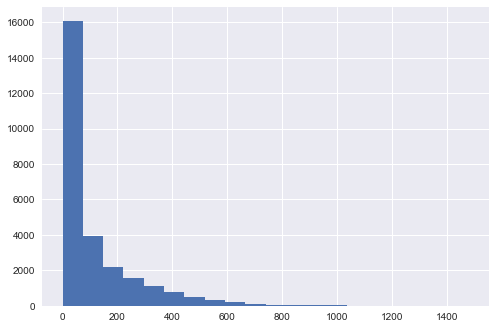

In [23]:
sample_origin.repo_num_1tth.hist(bins=20)